## **Zeroth-Order Optimization (ZOO) Attack and Binary Input Detector Using CIFAR-10**

### **Zero-Order Optimization (ZOO) Attack - Overview**

The Zero-Order Optimization (ZOO) attack is a black-box adversarial attack introduced by Athalye, Carlini, and Wagner in 2018. This attack targets scenarios where the attacker has no access to the model's gradients or any internal information (such as architecture or weights). In contrast to attacks like FGSM or PGD, which rely on gradient information, ZOO uses zero-order optimization to generate adversarial examples by querying the model and using the output (e.g., class probabilities) to estimate gradients indirectly.

#### **Key Concepts**

**1. Black-box Attack**: The attacker only has access to the model’s outputs (e.g., logits or probabilities) for different inputs, without any access to the model's parameters, gradients, or internal structure.

**2. Zero-Order Optimization**: Instead of computing gradients directly, ZOO estimates the gradient using finite differences based on model queries. This is a numerical method where the gradient is approximated by observing how small changes to the input affect the output.

**3. Adversarial Example**: A perturbation of the input that is designed to make the model misclassify the input while keeping the perturbation imperceptible to humans.

#### **How Zero-Order Optimization (ZOO) Works**

The ZOO attack formulates the generation of adversarial examples as an optimization problem. The main goal is to find an input perturbation $δ$ that minimizes the loss or maximizes the misclassification score. This perturbation is computed using an optimization procedure, where the gradients are approximated using finite differences, i.e., by querying the model multiple times with perturbed inputs.
The ZOO Attack Formulation

#### **The ZOO attack optimizes the following objective function:**
$$L(x_{adv},x)=E[Loss(f(x_{adv}),y)]+λ⋅∥x_{adv}−x∥_{p}$$

Where:

* $x_{adv}$​ is the adversarial example.
* $x$ is the original input.
* $f(x_{adv})$ is the model's output for the adversarial input $x_{adv}$​.
* $y$ is the true label of the original input $x$.
* $λ$ is a regularization parameter that controls the trade-off between adversarial effectiveness and perturbation magnitude.
* $∥x_{adv}−x∥_{p}$​ is the perturbation magnitude, typically measured using the pp-norm (e.g., $p=2$ for Euclidean distance).

The attack attempts to perturb $x$ to minimize this objective function, thus ensuring that the adversarial example $x_{adv}$​ causes the model to misclassify while maintaining a small perturbation.

#### **Step 1: Finite Difference Gradient Estimation**

Since we do not have direct access to the gradients of the model, we use finite differences to estimate the gradient. This involves querying the model multiple times with small perturbations and measuring how the outputs change in response.

For an input xx and a perturbation vector $δ$, the gradient estimate for a particular dimension $i$ of the input is given by:

$$\hat{∇}_{i}​=\frac{f(x + \epsilon e_i) - f(x - \epsilon e_i)}{2\epsilon}​$$

Where:

* $\hat{∇}_{i}$​ is the estimate of the gradient in the i-th direction.
* $f(x)$ is the model's output (e.g., class probability or logits) for the input $x$.
* $ϵ$ is a small perturbation (step size), and eiei​ is the unit vector along the $i$-th dimension of the input.
* The term $f(x+ϵei)$ represents the output of the model when the input $x$ is perturbed positively along the i-th axis by $ϵ$.
* The term $f(x−ϵei)$ represents the output of the model when the input $x$ is perturbed negatively along the $i$-th axis by $ϵ$.

#### **Step 2: Optimization Procedure**

Using these estimated gradients, the attack proceeds to optimize the perturbation $δ$ iteratively. The objective function for the optimization can be written as:
$$L(δ)=E[Loss(f(x+δ),y)]+λ⋅∥δ∥_{p}$$


Where:

* $δ$ is the perturbation that is being optimized.
* $f(x+δ)$ is the model’s output for the perturbed input $x+δ$.
* $λ$ controls the trade-off between minimizing the loss (misclassification) and minimizing the magnitude of the perturbation.
* The regularization term $∥δ∥_{p}$​ ensures that the perturbation is not too large and remains imperceptible to humans.

The optimization problem is solved using an iterative algorithm like L-BFGS or Adam, which adjusts $δ$ to minimize the objective function.

#### **Step 3: Querying and Perturbing the Input**

For each iteration, the following steps are performed:

**1. Perturb** the input $x$ by a small amount $δ$.

**2. Query the model** with the perturbed inputs $x+δ$ and $x−δ$.

**3. Estimate the gradient** using the finite difference method.

**4. Update the perturbation** $δ$ based on the gradient information to reduce the misclassification loss while controlling the perturbation size.

#### **Step 4: Generating the Adversarial Example**

The attack continues until the optimization converges, i.e., until the adversarial example $x_{adv}=x+δ$ successfully misclassifies the model or the perturbation reaches the desired magnitude.
Zero-Order Optimization (ZOO) Attack Process

**1. Initialize** the original input $x$ and true label $y$.

**2. Set the regularization parameter** $λ$ and perturbation size $ϵ$.

**3. Iterate** over the optimization procedure:
* Use finite differences to estimate the gradient for each dimension of the input.
* Update the perturbation $δ$ using an optimization algorithm (e.g., L-BFGS or Adam).

**4. Final adversarial example** $x_{adv}=x+δ$.

#### **Strengths and Weaknesses of ZOO**

**Strengths:**

* **Black-box Applicability**: ZOO is designed specifically for black-box attacks, where the attacker has no access to the model's internals (e.g., weights, gradients, architecture).
* **High Success Rate**: Despite being a black-box attack, ZOO is highly effective and can generate adversarial examples that successfully mislead the model.
* **Versatility**: ZOO can be applied to various models and tasks (e.g., classification, regression), as long as the attacker can query the model.

**Weaknesses:**

* **Query Intensive**: ZOO requires many queries to estimate the gradients, making it computationally expensive, especially for high-dimensional inputs such as images.
* **Slow Convergence**: The optimization may take time to converge, particularly when the perturbation space is large (e.g., for high-dimensional inputs such as images).
* **Dependence on Perturbation Size**: The success of ZOO heavily depends on the choice of $ϵ$ (perturbation size). A large ϵϵ might make the perturbation visible, while a small ϵϵ might not be sufficient to fool the model.

## **Implementation**

This notebook demonstrates the implementation of the ZOO attack using the Adversarial Robustness Toolbox (ART) against deep learning models trained on the CIFAR-10 dataset. The tasks covered in this notebook are:

1. Load the Required Libraries

2. Load the Dataset and Inspect the Data

3. Create a Deep Learning Model

4. Train and Evaluate the Deep Learning Model on CIFAR-10 Test Data

5. Implement ZOO Attack Using ART

6. Create Adversarial Samples Using the Z00 Attack

7. Evaluate the Deep Learning Model Against the Adversarial Samples

8. Create a Detector Model to Detect Adversarial Samples

9. Train and Evaluate the Detector Model

### Import and install required libaries

In [ ]:
# Install the Adversarial Robustness Toolbox for creating and evaluating adversarial attacks.
!pip install adversarial-robustness-toolbox

# Install VisualKeras for visualizing model architecture with layer types and connections.
!pip install visualkeras

In [1]:
# Suppress warnings to keep the output clean.
import warnings
warnings.filterwarnings('ignore')

# Import TensorFlow and other necessary libraries.
import tensorflow as tf
# (Optional) Disable eager execution for TensorFlow v1 compatibility.
# tf.compat.v1.disable_eager_execution()

import numpy as np
from matplotlib import pyplot as plt
# import pandas as pd  # Commented out: not used in this script.

# Import essential Keras components for building a CNN model.
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2

# Import tools from Adversarial Robustness Toolbox (ART).
from art.utils import load_cifar10, preprocess, to_categorical  # For loading and preparing the CIFAR-10 dataset.

# Import ART components for model wrapping, attacks, and defenses.
from art.estimators.classification import KerasClassifier          # Wraps a Keras model for ART compatibility.
from art.attacks.evasion import ZooAttack                          # Defines an adversarial attack method.
from art.defences.detector.evasion import BinaryInputDetector      # Used for detecting adversarial examples.

2025-08-26 14:15:14.327425: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-26 14:15:14.340276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756235714.357166  411317 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756235714.362758  411317 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-26 14:15:14.379922: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### Load CIFAR-10 dataset

In [3]:
# Load the CIFAR-10 dataset using ART's utility function.
# This function returns pre-split training and testing data along with their min/max pixel values.
(x_train, y_train), (x_test, y_test), min_, max_ = load_cifar10()

# Define the class names corresponding to CIFAR-10 labels for reference.
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

# Retrieve the minimum and maximum pixel values from the training data
# (should typically be in the range [0, 255] before normalization).
min_val = x_train.min()
max_val = x_train.max()

# Output dataset shapes and value range for verification.
x_train.shape, y_train.shape, x_test.shape, y_test.shape, min_val, max_val


((50000, 32, 32, 3),
 (50000, 10),
 (10000, 32, 32, 3),
 (10000, 10),
 np.float64(0.0),
 np.float64(1.0))


### Inspect the Data


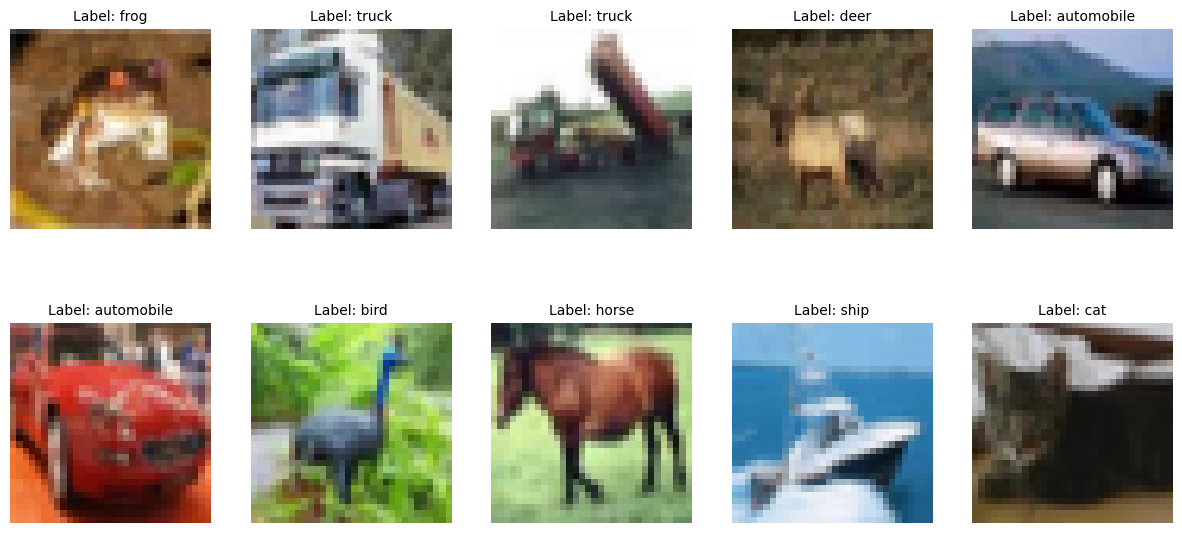

In [5]:
# Plot 10 sample images from the CIFAR-10 training set with their corresponding class labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))  # Create a 2x5 grid of subplots.
ax = ax.flatten()  # Flatten the axes array for easy iteration.

# Display the first 10 training images along with their human-readable class names.
for i, (image, label) in enumerate(zip(x_train[:10], y_train[:10])):
    ax[i].imshow(image)  # Show the image (in RGB).

    # Decode the one-hot encoded label back to its class index, then get the class name.
    ax[i].set_title(f"Label: {class_name[label.argmax()]}", fontsize=10)
    ax[i].axis('off')  # Hide axis ticks for cleaner visualization.

## **Training the Model**

### **Model Description (CIFAR-10 CNN)**

This convolutional neural network (CNN) is designed for image classification on the CIFAR-10 dataset. The architecture includes multiple convolutional blocks, each followed by regularization techniques such as dropout and batch normalization to improve performance and reduce overfitting.

* **Input Layer**: Accepts RGB images of shape (32, 32, 3).

* **Convolutional Blocks**:

  * **Block 1**: Two convolutional layers with 32 filters each, followed by max pooling, dropout (25%), and batch normalization.
  * **Block 2**: Two convolutional layers with 64 filters, followed by max pooling, dropout (25%), and batch normalization.
  * **Block 3**: Two convolutional layers with 128 filters, followed by max pooling, dropout (25%), and batch normalization.
  * **Block 4**: Two convolutional layers with 256 filters, followed by max pooling, dropout (25%), and batch normalization.

* **Fully Connected Layers**:

  * Dense layer with 512 units (ReLU activation) and dropout (50%).
  * Dense layer with 64 units (ReLU activation) and dropout (50%).

* **Output Layer**: Dense layer with 10 units and softmax activation to classify the input image into one of 10 CIFAR-10 classes.

The model is compiled using the **Adam optimizer**, with **categorical cross-entropy** as the loss function and **accuracy** as the evaluation metric.


In [6]:
# Define a deeper Convolutional Neural Network (CNN) for CIFAR-10 image classification.
model = tf.keras.models.Sequential([
    # First convolutional block: two Conv2D layers followed by pooling, dropout, and batch normalization
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Fourth convolutional block
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Flatten feature maps to feed into dense layers
    tf.keras.layers.Flatten(),

    # Fully connected layers with dropout for regularization
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Output layer with 10 units (one per class) and softmax activation
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

I0000 00:00:1756235752.542332  411317 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 45430 MB memory:  -> device: 2, name: Quadro RTX 8000, pci bus id: 0000:73:00.0, compute capability: 7.5


### Visualize the CNN Architecture

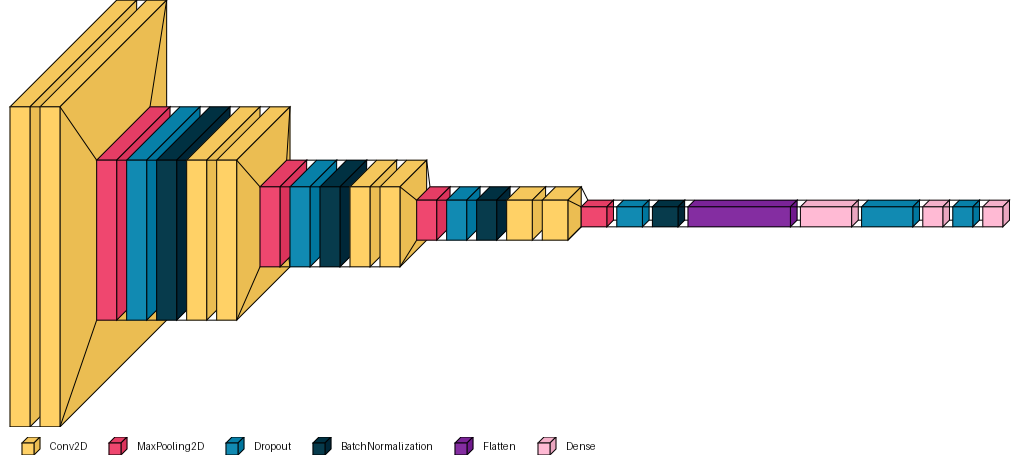

In [ ]:
# import visualkeras
# Display a layered visual representation of the model architecture.
# 'scale_xy' controls the scaling of the diagram.
# 'legend=True' shows layer types with corresponding color codes.
# visualkeras.layered_view(model, scale_xy=10, legend=True)

### Model Summary

In [7]:
# Print a detailed summary of the model architecture,
# including layer types, output shapes, and number of parameters.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             

 Total params: 1,732,458 (6.61 MB)

 Trainable params: 1,731,498 (6.61 MB)

 Non-trainable params: 960 (3.75 KB)

### Visualize Model Architecture Diagram

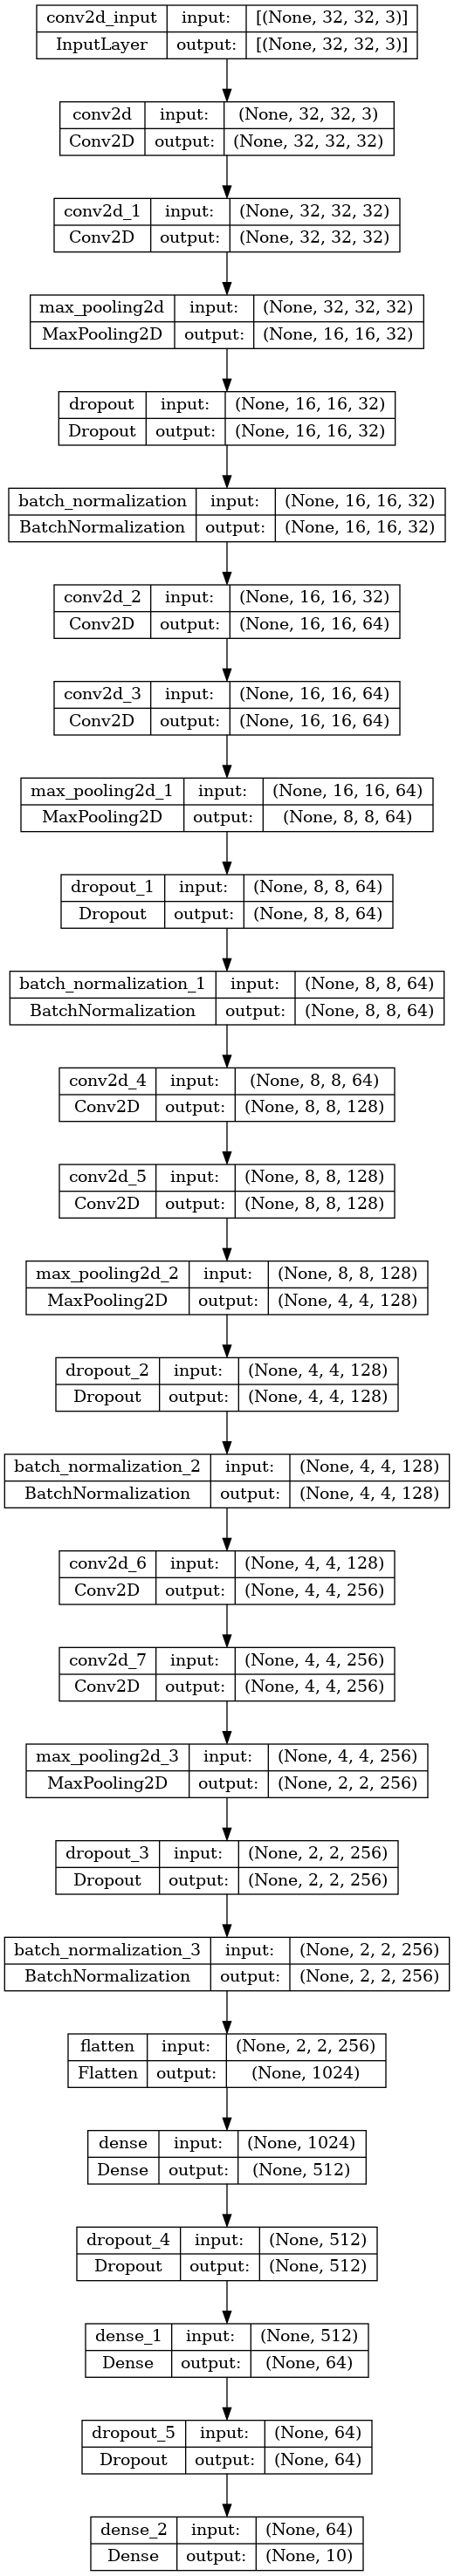

In [ ]:
# Generate and display a plot of the model architecture,
# showing each layer’s name and output shape.
# tf.keras.utils.plot_model(model, show_shapes=True, dpi = 75)

### Train the model

In [ ]:
# Train the model on the training data for 250 epochs.
# The history object stores training metrics and loss values.
# history = model.fit(x_train, y_train, batch_size=128, epochs = 250)

### Save/load the model

In [ ]:
# Define the path where the trained model will be saved
model_path = './cifar10_cnn_model.keras'

# If you have trained your own model and want to save it, uncomment and run:
# model.save(model_path)


# Otherwise, load the pretrained model provided (e.g., from GitHub or another source).
# !wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/Models/cifar10_cnn_model.keras -O cifar10_cnn_model.keras
# model = tf.keras.models.load_model('cifar10_cnn_model.keras')

# Display the model architecture summary to make sure the model has successfully been loaded.
# model.summary()

### Evaluate model accuracy on test data.

In [10]:
# Evaluate the model on the test dataset and get loss and accuracy.
loss_test, accuracy_test = model.evaluate(x_test, y_test)

# Print the test accuracy as a percentage.
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

I0000 00:00:1756235829.508310  411793 service.cc:148] XLA service 0x73470400bc30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756235829.508380  411793 service.cc:156]   StreamExecutor device (0): Quadro RTX 8000, Compute Capability 7.5
2025-08-26 14:17:09.531776: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1756235829.595518  411793 cuda_dnn.cc:529] Loaded cuDNN version 91200
2025-08-26 14:17:09.812536: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"act

 72/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.7879

I0000 00:00:1756235830.623707  411793 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


296/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8671 - loss: 0.8420

2025-08-26 14:17:11.376740: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 14:17:11.397528: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,32,32]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationF

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8646 - loss: 0.8665
Accuracy on test data: 86.46%


### Wrap the Keras Model with an ART Classifier

In [11]:
# Create an ART KerasClassifier to enable adversarial robustness tools.
# 'clip_values' defines the input data range for normalization and attack generation.
classifier = KerasClassifier(model=model, clip_values=(min_val, max_val))

### **Zeroth-Order Optimization (ZOO) Attack**

### Overview

> class art.attacks.evasion.ZooAttack(classifier: CLASSIFIER_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, max_iter: int = 10, binary_search_steps: int = 1, initial_const: float = 0.001, abort_early: bool = True, use_resize: bool = True, use_importance: bool = True, nb_parallel: int = 128, batch_size: int = 1, variable_h: float = 0.0001, verbose: bool = True)

The black-box zeroth-order optimization attack from Pin-Yu Chen et al. (2018). This attack is a variant of the C&W attack which uses ADAM coordinate descent to perform numerical estimation of gradients.
* Paper link: https://arxiv.org/abs/1708.03999

*__init__(classifier: CLASSIFIER_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, max_iter: int = 10, binary_search_steps: int = 1, initial_const: float = 0.001, abort_early: bool = True, use_resize: bool = True, use_importance: bool = True, nb_parallel: int = 128, batch_size: int = 1, variable_h: float = 0.0001, verbose: bool = True)*

**Create a ZOO attack instance.**

**Parameters**

* classifier – A trained classifier.
* confidence (float) – Confidence of adversarial examples: a higher value produces examples that are farther away, from the original input, but classified with higher confidence as the target class.
* targeted (bool) – Should the attack target one specific class.
* learning_rate (float) – The initial learning rate for the attack algorithm. Smaller values produce better results but are slower to converge.
* max_iter (int) – The maximum number of iterations.
* binary_search_steps (int) – Number of times to adjust constant with binary search (positive value).
* initial_const (float) – The initial trade-off constant c to use to tune the relative importance of distance and confidence. If binary_search_steps is large, the initial constant is not important, as discussed in Carlini and Wagner (2016).
* abort_early (bool) – True if gradient descent should be abandoned when it gets stuck.
* use_resize (bool) – True if to use the resizing strategy from the paper: first, compute attack on inputs resized to 32x32, then increase size if needed to 64x64, followed by 128x128.
* use_importance (bool) – True if to use importance sampling when choosing coordinates to update.
* nb_parallel (int) – Number of coordinate updates to run in parallel. A higher value for nb_parallel should be preferred over a large batch size.
* batch_size (int) – Internal size of batches on which adversarial samples are generated. Small batch sizes are encouraged for ZOO, as the algorithm already runs nb_parallel coordinate updates in parallel for each sample. The batch size is a multiplier of nb_parallel in terms of memory consumption.
* variable_h (float) – Step size for numerical estimation of derivatives.
* verbose (bool) – Show progress bars.

> generate(x: ndarray, y: Optional[ndarray] = None, **kwargs) → ndarray

**Generate adversarial samples and return them in an array.**

**Return type**
* ndarray

**Parameters**
* x (ndarray) – An array with the original inputs to be attacked.
* y – Target values (class labels) one-hot-encoded of shape (nb_samples, nb_classes) or indices of shape (nb_samples,).

**Returns**
* An array holding the adversarial examples.

**Link**
documetation: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#zeroth-order-optimization-zoo-attack
github: https://github.com/Trusted-AI/adversarial-robustness-toolbox/blob/main/art/attacks/evasion/zoo.py

### Create an ART ZOO attack.

In [12]:
zoo_attack = ZooAttack(classifier = classifier,
                       learning_rate=0.1,
                       targeted = False,
                       max_iter = 500,
                       verbose = True,
                       batch_size=32,
                       nb_parallel=32, )

#### Generate adversarial test data.

In [ ]:
# Reduce test set size to 500 samples for faster adversarial generation and evaluation.
x_test = x_test[:500]
y_test = y_test[:500]

# Generate adversarial examples from the reduced test set using the zoo attack.
x_test_adv = zoo_attack.generate(x_test)

ZOO: 100%|██████████| 16/16 [01:20<00:00,  5.04s/it]


### Save or Load PGD-Generated Adversarial Test Data

In [14]:
# Option 1: Save your newly generated adversarial test data (uncomment to use).
zoo_data_path = 'zoo_poison_data_cifar10_test_S500.npz'
np.savez(zoo_data_path,
         x_test_adv=x_test_adv, y_test_adv=y_test)

# Option 2: Load previously saved adversarial test data (recommended for reuse or quick experiments).
# Download the data file from GitHub raw URL
# !wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/data/zoo_poison_data_cifar10_test_S500.npz

# x_test_data = np.load(zoo_data_path)
# x_test_adv, y_test = x_test_data['x_test_adv'], x_test_data['y_test_adv']
# x_test_adv.shape, y_test.shape

#### Visualise the first adversarial test sample.

2025-08-26 14:34:56.385782: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 14:34:56.399161: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,32,32,32]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForwa

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


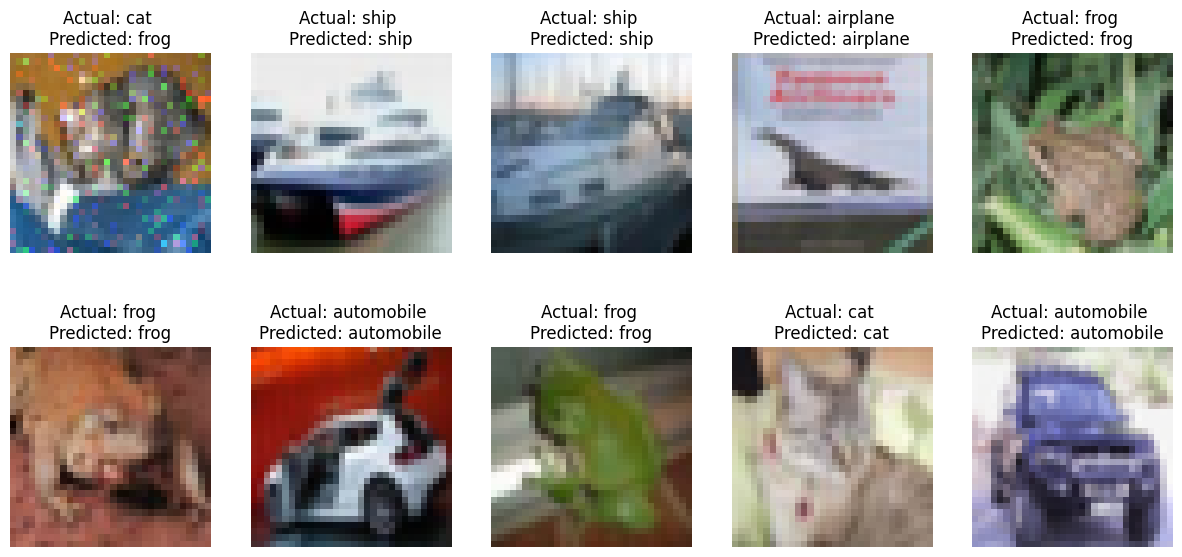

In [15]:
# Display the first 10 adversarial examples along with their actual and predicted labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_test_adv[:10], y_test[:10])):
    # Display the adversarial image.
    ax[i].imshow(image)

    # Show actual and predicted labels.
    prediction = model.predict(np.expand_dims(image, axis=0)).argmax()
    ax[i].set_title(f"Actual: {class_name[label.argmax()]} \nPredicted: {class_name[prediction]}", fontsize=12)
    ax[i].axis('off')

### Evaluate the Model on Adversarial Test Data

In [16]:
# Evaluate model performance on adversarial examples.
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)

# Calculate the average perturbation introduced by the adversarial attack.
perturbation = np.mean(np.abs(x_test_adv - x_test))

# Print evaluation results.
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9062 - loss: 0.6344

2025-08-26 14:35:07.212290: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 14:35:07.238139: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,32,32,32]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationF

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8700 - loss: 0.7113
Accuracy on adversarial test data: 87.00%
Average perturbation: 0.00


## Prepare Training Data for Adversarial Sample Detector

In [17]:
# Generate new adversarial examples from a subset of the training data using ZOO.
x_train_adv = zoo_attack.generate(x_train[:500])
nb_train = x_train[:500].shape[0]

# Combine clean and adversarial samples to create a binary classification dataset for detection.
x_train_detector = np.concatenate((x_train[:500], x_train_adv), axis=0)

# Create labels: [1, 0] for clean samples, [0, 1] for adversarial samples.
y_train_detector = np.concatenate((
    np.array([[1, 0]] * nb_train),  # Clean
    np.array([[0, 1]] * nb_train)   # Adversarial
), axis=0)

ZOO: 100%|██████████| 16/16 [01:13<00:00,  4.58s/it]


### Save or Load Adversarial Detector Training Data

In [18]:
# Option 1: Save generated clean and adversarial samples for training the detector.
np.savez('./zoo_poison_data_cifar10_train_S1000.npz',
         x_train_detector=x_train_detector, y_train_detector=y_train_detector)

# Option 2: Load pre-saved detector training data to avoid regeneration.
# detector_data = np.load('./zoo_generated_data/zoo_detector_generated_cifar10.npz')
# x_train_detector, y_train_detector = detector_data['x_train_detector'], detector_data['y_train_detector']

# Verify the shape of loaded or prepared data.
# x_train_detector.shape, y_train_detector.shape

## Build a similar CNN architecture model for detecting Adversarial Inputs

In [19]:
detector_model = tf.keras.models.Sequential([
    # First convolutional block: two Conv2D layers followed by pooling, dropout, and batch normalization
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Fourth convolutional block
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Flatten feature maps to feed into dense layers
    tf.keras.layers.Flatten(),

    # Fully connected layers with dropout for regularization
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Output layer with 2 units (one per class) and softmax activation
    tf.keras.layers.Dense(2, activation='softmax') # Two output classes: [clean, adversarial]
])

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
detector_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Train the Adversarial Detector Model

In [20]:
# Train the adversarial detector model for 10 epochs.
# Since the goal is to distinguish between clean and adversarial inputs,
# a few epochs (e.g., 10) are typically sufficient to learn this binary classification task.
history = detector_model.fit(x_train_detector, y_train_detector, epochs=10)

Epoch 1/10


2025-08-26 14:37:37.700992: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 14:37:37.731451: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,32,32]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationF

29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4741 - loss: 1.1233

2025-08-26 14:37:43.561941: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 14:37:43.585958: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,32,32,32]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForwa

32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 169ms/step - accuracy: 0.4890 - loss: 1.0008
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4850 - loss: 0.7762
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4950 - loss: 0.7184
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4910 - loss: 0.7095
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5090 - loss: 0.6963
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5160 - loss: 0.6980
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5160 - loss: 0.7008
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5010 - loss: 0.6967
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 0.6924
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 0.6954


In [22]:
# Define path to save/load the detector model
detector_model_path = './zoo_detector_model_cifar10.keras'
# detector_model.save(detector_model_path)

# Load the pre-trained detector model from the specified path
# detector_model = tf.keras.models.load_model(path)

# Display the model architecture to make sure the models has been loaded successfully.
detector_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             

 Total params: 5,193,896 (19.81 MB)

 Trainable params: 1,730,978 (6.60 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 3,461,958 (13.21 MB)

## Prepare test samples for the detector model

#### Evaluate the adversarial generated data

In [23]:
# Get the number of original test samples
nb_test = x_test.shape[0]

# Combine clean and adversarial test images into one array
x_test_detector = np.concatenate((x_test, x_test_adv), axis=0)

# Create corresponding labels: [1, 0] for clean, [0, 1] for adversarial
y_test_detector = np.concatenate((np.array([[1, 0]] * nb_test),
                                  np.array([[0, 1]] * nb_test)), axis=0)

### Evaluat the result

In [24]:
loss_test, accuracy_test = detector_model.evaluate(x_test_detector, y_test_detector)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

18/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9869 - loss: 0.6787   

2025-08-26 14:38:04.048443: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 14:38:04.081614: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,32,32,32]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForwa

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5000 - loss: 0.6933
Accuracy on test data: 50.00%


### Wrap detector model for adversarial detection

In [25]:
# Wrap the Keras detector model with ART's KerasClassifier
detector_classifier = KerasClassifier(clip_values=(0.0, 0.1), model=detector_model, use_logits=False)

# Create a BinaryInputDetector using the wrapped classifier
detector = BinaryInputDetector(detector_classifier)

## Train the BinaryInputDetector

In [26]:
# Train the detector on labeled clean and adversarial training data
detector.fit(x_train_detector, y_train_detector, nb_epochs=10, batch_size=32)

#### Evaluating the detector

In [27]:
# Apply the detector to the adversarial test data
_, is_adversarial = detector.detect(x_test_adv)

# Count how many adversarial samples were flagged
flag_adv = np.sum(is_adversarial)

# Display detection results
print("Adversarial test data (first 500 images):")
print("Flagged: {}".format(flag_adv))
print("Not flagged: {}".format(500 - flag_adv))

Adversarial test data (first 500 images):
Flagged: 63
Not flagged: 437


#### Evaluating the detector on clean (non-adversarial) data

In [29]:
_, is_adversarial = detector.detect(x_test)
flag_original = np.sum(is_adversarial)

print("Original test data (first 500 images):")
print("Flagged: {}".format(flag_original))
print("Not flagged: {}".format(500 - flag_original))

Original test data (first 500 images):
Flagged: 64
Not flagged: 436


#### Evaluate the detector across different attack strengths (black-box setting):

In [30]:
# Note: Detector was trained with adversarial samples generated using eps = 0.2

learning_rate = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3]
nb_flag_adv = []      # Number of adversarial examples flagged by the detector
nb_missclass = []     # Number of adversarial examples that fooled the classifier

zoo_attack.set_params(**{'max_iter' : 10})

for rate in learning_rate:
    # Update ZOO attack with current learning rate
    zoo_attack.set_params(**{'learning_rate': rate})

    # Generate adversarial examples for current eps
    x_test_adv = zoo_attack.generate(x_test[:100])

    # Count how many were flagged by the detector
    nb_flag_adv.append(np.sum(detector.detect(x_test_adv)[1]))

    # Count how many were misclassified by the classifier
    nb_missclass += [np.sum(np.argmax(classifier.predict(x_test_adv), axis=1) != np.argmax(y_test[:100], axis=1))]

# Add clean data evaluation (lr=0) to the results
learning_range = [0] + learning_rate
nb_flag_adv = [flag_original] + nb_flag_adv # flag_original from clean data detection
nb_missclass = [2] + nb_missclass           # 2 misclassifications in clean test subset

ZOO: 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


#### Plot detector performance vs. classifier errors for varying attack strengths

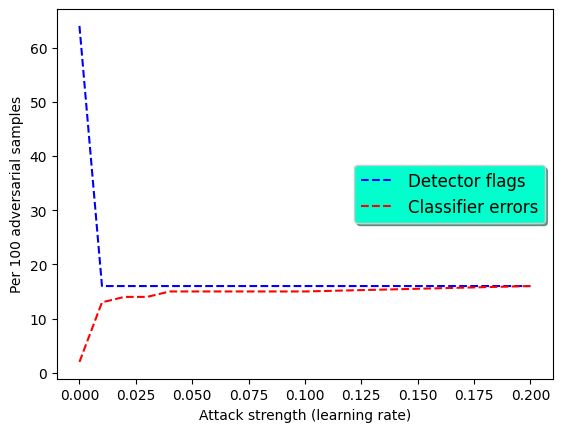

In [31]:
fig, ax = plt.subplots()
ax.plot(np.array(learning_range)[:8], np.array(nb_flag_adv)[:8], 'b--', label='Detector flags')
ax.plot(np.array(learning_range)[:8], np.array(nb_missclass)[:8], 'r--', label='Classifier errors')

legend = ax.legend(loc='center right', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('#00FFCC')

plt.xlabel('Attack strength (learning rate)')
plt.ylabel('Per 100 adversarial samples')
plt.show()

Evaluate the adversarial generated data

### **Summary**


#### Zeroth-Order Optimization (ZOO) Attack and Binary Input Detector Using CIFAR-10

This notebook demonstrates the implementation of the ZOO attack using the Adversarial Robustness Toolbox (ART) against deep learning models trained on the CIFAR-10 dataset. The tasks covered include:

1. **Load the Required Libraries:** Import necessary Python libraries and modules, including TensorFlow/Keras and ART.
2. **Load the Dataset and Inspect the Data:** Load and visualize the CIFAR-10 dataset.
3. **Create a Deep Learning Model:** Construct and compile a ResNet-18 model.
4. **Train and Evaluate the Model:** Train the model on CIFAR-10 and evaluate its accuracy.
5. **Implement ZOO Attack Using ART:** The Zeroth Order Optimization (ZOO) attack is notable for its effectiveness in black-box settings, where only the model's output is accessible.
6. **Create Adversarial Samples Using ZOO:** Generate adversarial examples from the test images using ZOO and visually inspect them.
7. **Evaluate Against Adversarial Samples:** Test the model's robustness by evaluating its accuracy on the adversarial samples.
8. **Create a Detector Model:** Develop a binary classifier to detect adversarial inputs by differentiating between original and adversarial images.
9. **Train and Evaluate the Detector:** Train the detector using a labeled dataset of original and adversarial samples, and evaluate its accuracy in identifying adversarial attacks.

This summary highlights the process and key tasks involved in implementing the ZOO attack and developing a binary input detector using the CIFAR-10 dataset, illustrating the importance of adversarial defenses in machine learning.